# **PERCEPTRÓN MULTICAPA**

Una red neuronal de perceptrón multicapa es un conjunto de nodos (neuronas) organizados en capas. Cada nodo en una capa está conectado a todos los nodos en la capa anterior y posterior, y cada conexión tiene un peso asociado. La salida de cada nodo se calcula como una función de activación aplicada a la suma ponderada de sus entradas.

La red se entrena utilizando el algoritmo de retropropagación, que ajusta los pesos de las conexiones para minimizar una función de pérdida que mide la diferencia entre las salidas predichas y las reales.

El clasificador `MLPClassifier` de la biblioteca `sklearn` es una implementación de la red neuronal de perceptrón multicapa. Es útil para problemas de clasificación y se basa en el aprendizaje supervisado. La red neuronal consta de múltiples capas de nodos, cada una conectada a las capas adyacentes.

### Ventajas

- Capacidad para modelar relaciones no lineales complejas.
- Flexibilidad para ajustar la arquitectura de la red (número de capas y nodos) según las necesidades del problema.
- Adecuado para una amplia gama de problemas de clasificación.

### Desventajas

- Requiere una cuidadosa selección de hiperparámetros para evitar el sobreajuste o el subajuste.
- El entrenamiento puede ser computacionalmente costoso, especialmente para redes grandes.
- La interpretación del modelo puede ser difícil debido a su naturaleza de "caja negra".

### Recomendaciones

- El perceptrón multicapa es sensitivo al escalamiento de los atributos, por lo tanto, es muy recomendado escalar los datos al rango (0,1), (-1, 1) o estandarizarlos.
- Encontrar un parámetro de regularización $\alpha$ adecuado, generalmente en el rango:

$$0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001$$

- Se ha observado empíricamente que el algoritmo LBFGS converge más rápidamente y con mejores soluciones para conjuntos de datos pequeños.
- Sin embargo, para conjuntos de datos relativamente grandes, Adam es mejor.

## **Funciones de activación**




  - **Función de activación de identidad**: No realiza ninguna transformación en la entrada; es decir, la salida es igual a la entrada.
  $$ f(x)= x$$
  Esta función se utiliza principalmente en la capa de salida de redes neuronales para problemas de regresión.
  - **Función de activación logística** o **sigmoide**, transforma las entradas en valores en el rango ($0$, $1$), lo que la hace útil para problemas de clasificación binaria. Convierte grandes valores negativos en 0 y grandes valores positivos en 1. Se define como:
  $$f(x) = \frac{1}{1+e^{-x}}$$
  - **Función de activación tangente hiperbólica** transforma las entradas en valores en el rango (-1, 1). Se define como:
  $$f(x) = \tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$$
  Esta función es similar a la sigmoide, pero con una salida centrada en cero, lo que puede mejorar la convergencia durante el entrenamiento de la red.
  - **Rectified Linear Unit (ReLU)**: función lineal por partes que mantiene los valores positivos de la entrada y convierte los valores negativos a cero. Se define como:
  $$f(x) = \max{(0, x)}$$
  ReLU es la función de activación más utilizada en redes neuronales profundas debido a su simplicidad computacional y a su capacidad para acelerar la convergencia del entrenamiento en comparación con funciones de activación sigmoidales o tangente hiperbólica.

## **Algoritmos de optimización**

El entrenamiento de una red neuronal implica **encontrar el conjunto de pesos** que **minimiza la función de pérdida**, que es una medida del error entre las salidas predichas por la red y las salidas reales esperadas. Este proceso de optimización se lleva a cabo a través de un algoritmo iterativo que ajusta los pesos de la red en cada paso con el objetivo de reducir la función de pérdida.

La retropropagación es un método esencial en este proceso, ya que permite calcular el gradiente de la función de pérdida con respecto a cada peso de la red. Una vez que se han calculado los gradientes mediante retropropagación, se utilizan algoritmos de optimización para actualizar los pesos de la red. La retropropagación proporciona la información necesaria sobre cómo los pesos afectan al error de la red, y los algoritmos de optimización utilizan esta información para actualizar los pesos de manera efectiva.

- **Limited-memory Broyden-Fletcher-Goldfarb-Shanno (LBFGS)**
  - Es un algoritmo de optimización de tipo cuasi-Newton que utiliza una aproximación de la matriz hessiana (segunda derivada de la función de pérdida) para actualizar los pesos.
  - LBFGS es una variante del algoritmo BFGS que utiliza una cantidad limitada de memoria para almacenar la aproximación del inverso del Hessiano.
  - Es un algoritmo adecuado para problemas de tamaño pequeño y mediano debido a su requisito de memoria y tiempo de cálculo.
- **Adaptive Moment Estimation (Adam)**
  - Adam mantiene estimaciones del primer y segundo momento del gradiente (es decir el promedio móvil del gradiente y su cuadrado) para ajustar la tasa de aprendizaje de cada peso individualmente.
  - Es una variante de SGD que combina dos extensiones:
    - RMSprop (que mantiene una tasa de aprendizaje adaptativa para cada parámetro)
    - El "momento" que ayuda a acelerar la convergencia en la dirección relevante y amortiguar irregularidades en la convergencia.
- **Stochastic Gradient Descent (SGD)**
  - Es un algoritmo de tipo gradiente descendiente que utiliza pequeños subconjuntos de datos para aproximar el gradiente en cada iteración. Esto hace que cada actualización sea computacionalmente menos costosa en comparación con el descenso de gradiente clásico, que utiliza todo el conjunto de datos.
  - La "estocasticidad" del SGD ayuda a evitar mínimos locales y mejora la generalización, pero puede generar que la convergencia sea más irregular.
  - Es adecuado para conjuntos de datos grandes debido a su eficiencia computacional.

## **Función de pérdida**

MLP usa diferentes funciones de pérdida dependiendo del tipo de problema. Para clasificación la función utilizada es la **Entropía Cruzada promedio**, que en el caso promedio es igual a

$$Loss(\hat{y}, y, W) = - \frac{1}{n}\sum_{i=0}^n (y_i \ln \hat{y}_i+ (1-y_i)\ln(1-\hat{y}_i))+\frac{\alpha}{2n}||W||_2^2$$

donde $$\frac{\alpha}{2n}||W||_2^2$$ es un término de regularización de la norma $L_2$ de los pesos, penalizando modelos muy complejos (pesos muy grandes). Y $\alpha>0$ es un hiperparámetro que controla la magnitud de la penalización.

## **Argumentos principales**



- `hidden_layer_sizes`: Una tupla que indica el número de neuronas en cada capa oculta. Por ejemplo, `(10, 5)` significa que la red cuenta con dos capas, una capa oculta con 10 neuronas y la capa final con 5 neuronas. El número de neuronas en la capa de salida se calculan automáticamente de acuerdo con el número de clases.
  - Para clasificación binaria, la capa de salida tiene una sola neurona.
  - Para clasificación multiclase, el número de neuronas en la capa de salida es igual al número de clases.

- `activation`: La función de activación para los nodos de la capa oculta:
  - `'identity'`
  - `'logistic'`
  - `'tanh'`
  - `'relu'`  

- `solver`: El algoritmo de optimización utilizado para la actualización de pesos:
  - `'lbfgs'`
  - `'sgd'`
  - `'adam'`

- `alpha`: Término de regularización para penalizar los pesos grandes y evitar el sobreajuste.

- `learning_rate`: Tipo de tasa de aprendizaje para la actualización de pesos:
  - `constant`
  - `invscaling` La tasa de aprendizaje desciende gradualmente en cada iteración:
  $$\alpha_t = \frac{\alpha_0}{t^p}$$
  donde $p$ corresponde al argumento `power_t`.
  - `adaptive` Mantiene la tasa de aprendizaje $\alpha_0$ constante  siempre que la función de pérdida en los datos de entrenamiento disminuya. Después de dos épocas consecutivas que no logran disminuir la función de pérdida, la tasa de aprendizaje se divide entre 5.

- `Learning_rate_init`: Tasa de aprendizaje inicial. Maneja el tamaño de paso en cada iteración. Sólo es usada cuando `solver='sdg'` o `solver='adam'`


- `power_t` Es el exponente de la tasa de aprendizaje de escala inversa. Sólo se usa con `learning_rate='invscaling'`
- `max_iter`: Número máximo de iteraciones para el entrenamiento.

## **Ejemplo de uso**


A continuación, se presenta un ejemplo de cómo utilizar `MLPClassifier` para clasificar conjuntos de datos

In [ ]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [ ]:
def plot_mlp_weights(mlp, ax, tol=0.001):
    G = nx.DiGraph()
    layer_sizes = [mlp.coefs_[0].shape[0]] + [coef.shape[1] for coef in mlp.coefs_]
    weights = mlp.coefs_

    # Agregar nodos con atributos para cada capa
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            node_id = (i, j)
            G.add_node(node_id, layer=i)

    # Agregar aristas con pesos
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for l in range(layer_sizes[i + 1]):
                weight = weights[i][j, l]
                if abs(weight) >= tol:
                  G.add_edge((i, j), (i + 1, l), weight=weight)

    # Dibujar el grafo
    pos = {node: (node[0], -node[1]) for node in G.nodes()}
    nx.draw(G, pos, ax=ax)
    edge_labels = {(u, v): f'{G[u][v]["weight"]:.3f}' for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, ax=ax,
                                  edge_labels=edge_labels, font_size=10)

In [ ]:
# Función para entrenar, predecir y graficar un perceptrón multicapa
def MultiLayer(X, y, net):
  # Dividir el conjunto de datos en entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.3,
                                                      random_state=42)
  # Crear y entrenar el clasificador MLP
  mlp = MLPClassifier(hidden_layer_sizes=net,
                      max_iter=1000,
                      activation='relu',
                      solver='adam',
                      random_state=42)
  mlp.fit(X_train, y_train)
  # Predecir las etiquetas para el conjunto de prueba
  y_pred = mlp.predict(X_test)
  # Calcular la precisión
  accuracy = accuracy_score(y_test, y_pred)
  # Graficar superficies de decisión
  fig, ax = plt.subplots(1, 2, figsize=(20, 10))
  DecisionBoundaryDisplay.from_estimator(
      mlp, X, ax=ax[0],
  )
  # Graficar las observaciones
  ax[0].scatter(X[:, 0], X[:, 1], edgecolors="k",  alpha=0.8, c=y)
  ax[0].set_title(f'Exactitud: {accuracy:.3f}\n {net}')
  plot_mlp_weights(mlp, ax[1])
  plt.show()

In [ ]:
# Tres redes utilizadas
net1 = (3, 10)
net2 = (20, 20)
net3 = (10, 10, 10)

### Ejemplo: Conjunto de datos de Iris

In [ ]:
iris = load_iris()
X = iris.data[:,0:2]
y = iris.target

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


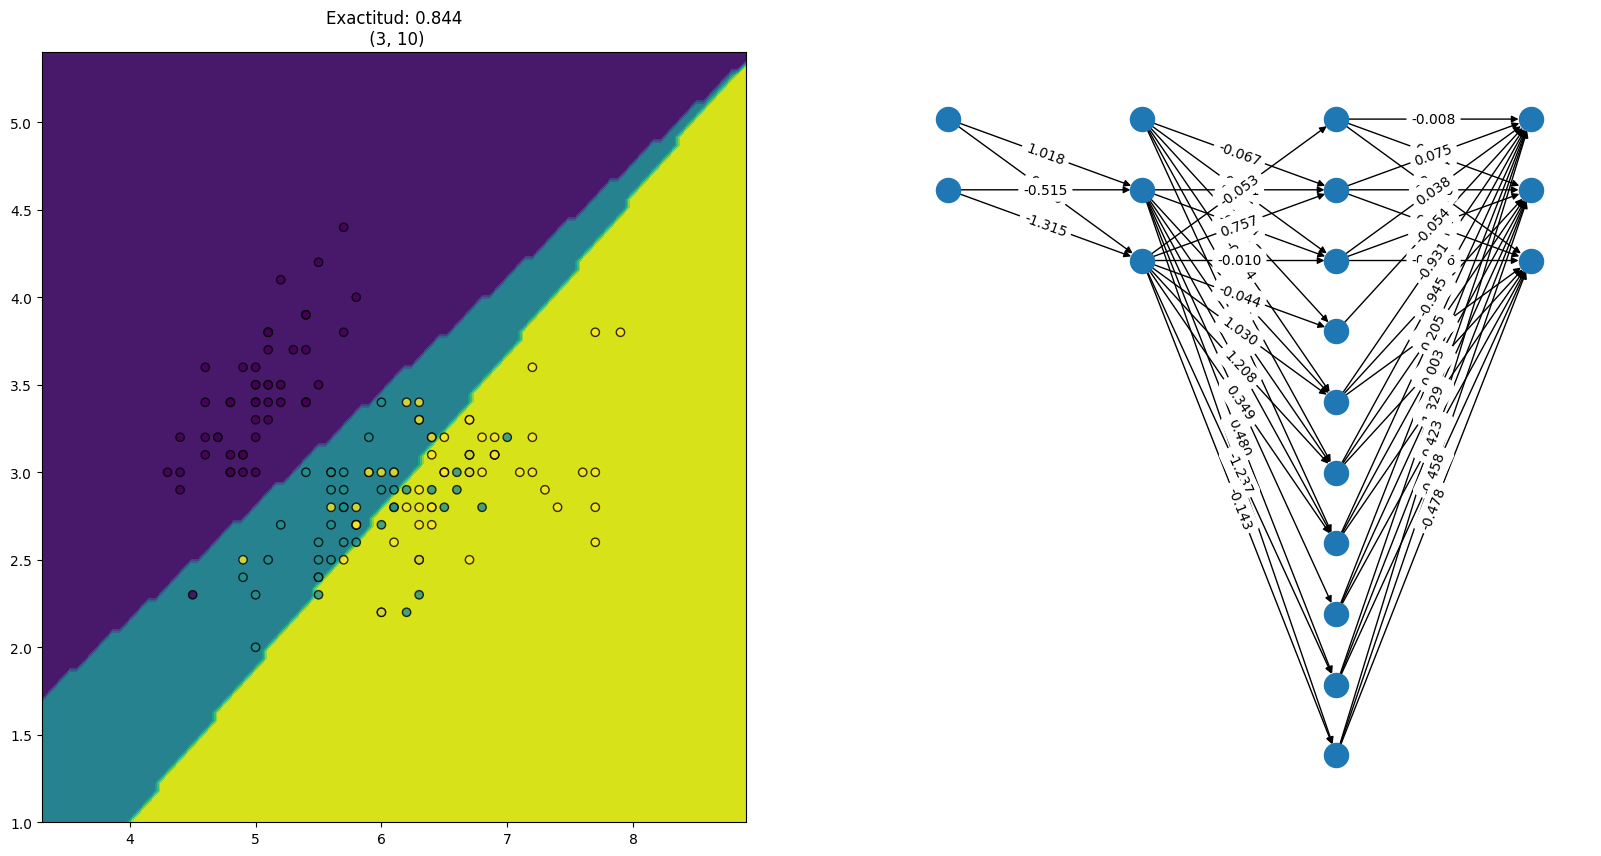

In [ ]:
MultiLayer(X, y, net1)

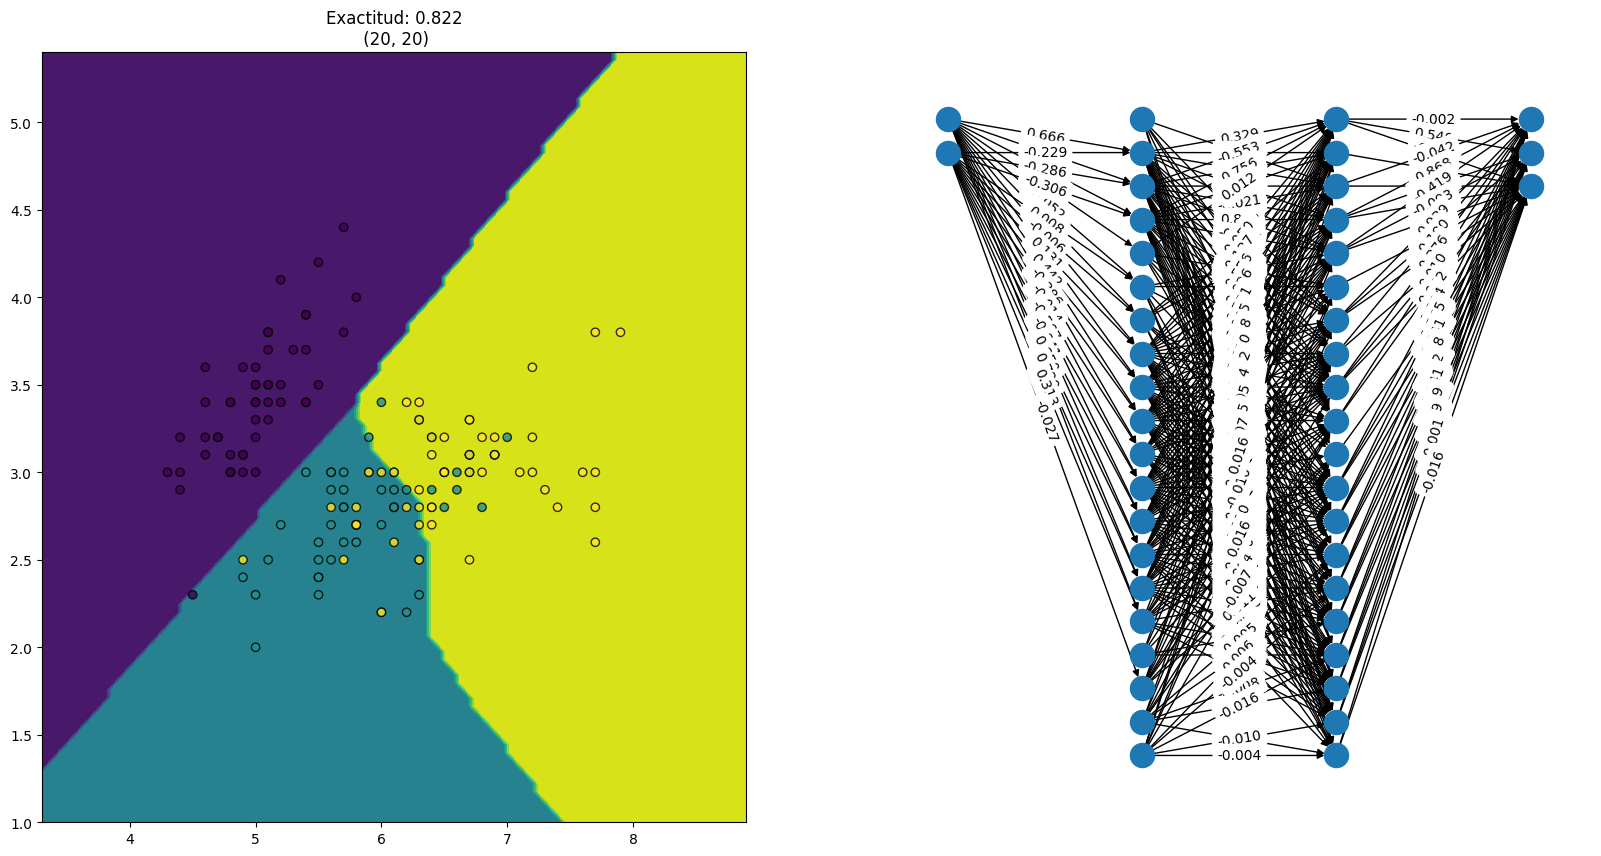

In [ ]:
MultiLayer(X, y, net2)

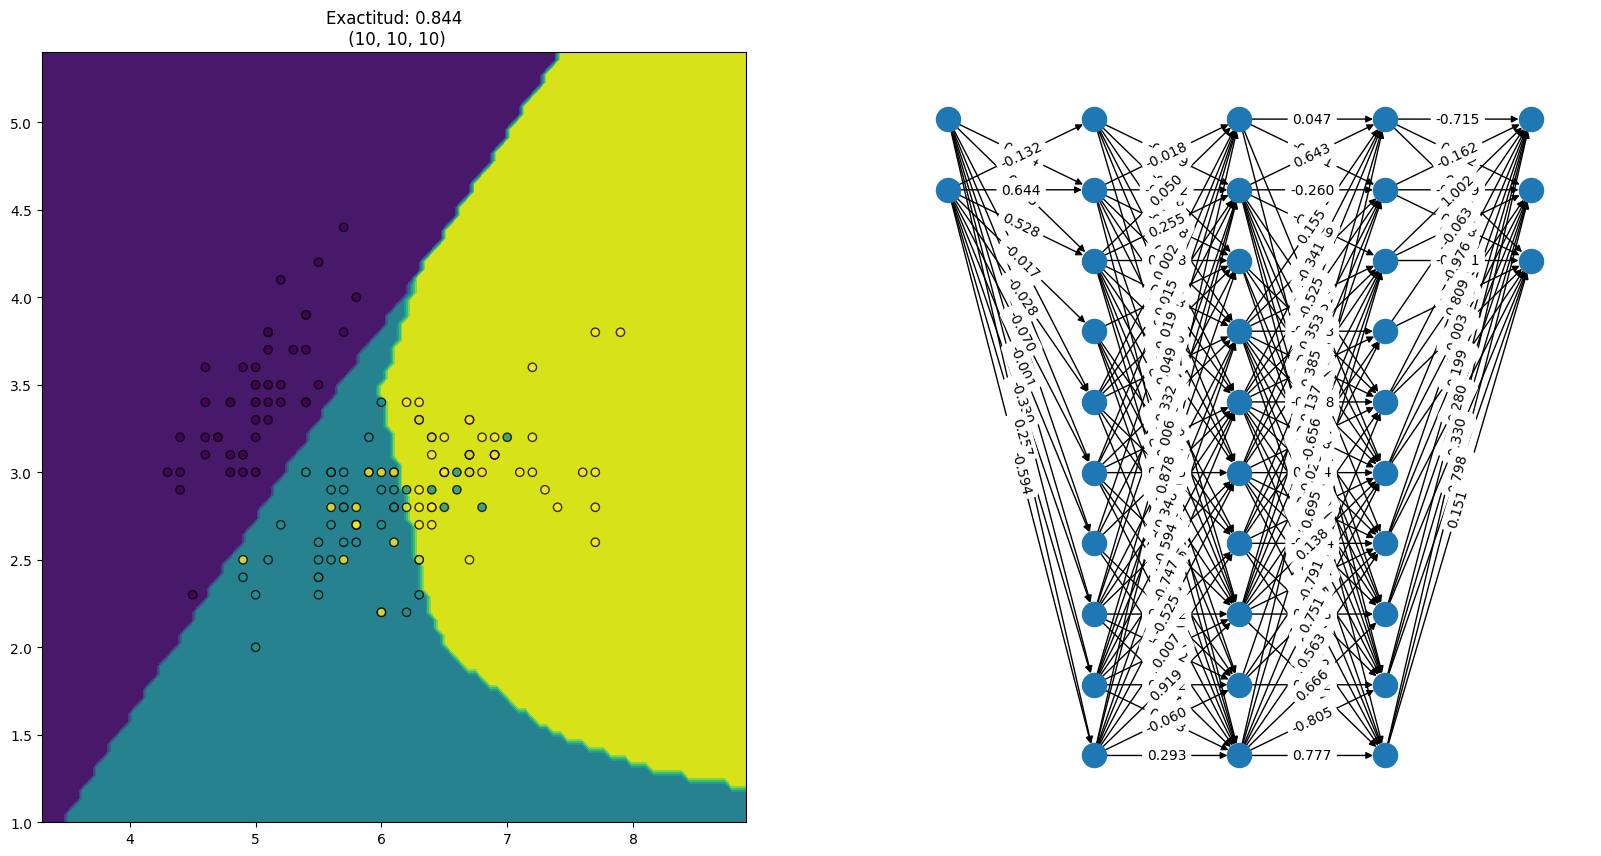

In [ ]:
MultiLayer(X, y, net3)

### Ejemplo: datos sintéticos

In [ ]:
from sklearn.datasets import make_classification, make_circles

In [ ]:
# Generar datos sintéticos (clusters)
X, y = make_classification(n_features=2, # Total de atributos
                           n_redundant=0, # Atributos redundantes (combinaciones lineales aleatorias de las características informativas)
                           n_informative=2, # Atributos duplicados (elegidas aleatoriamente entre informativas y redundantes)
                           n_classes=3,
                           random_state=1,
                           n_clusters_per_class=1
)
#Nota: n_classes*n_clusters_per_class < 2**n_informative

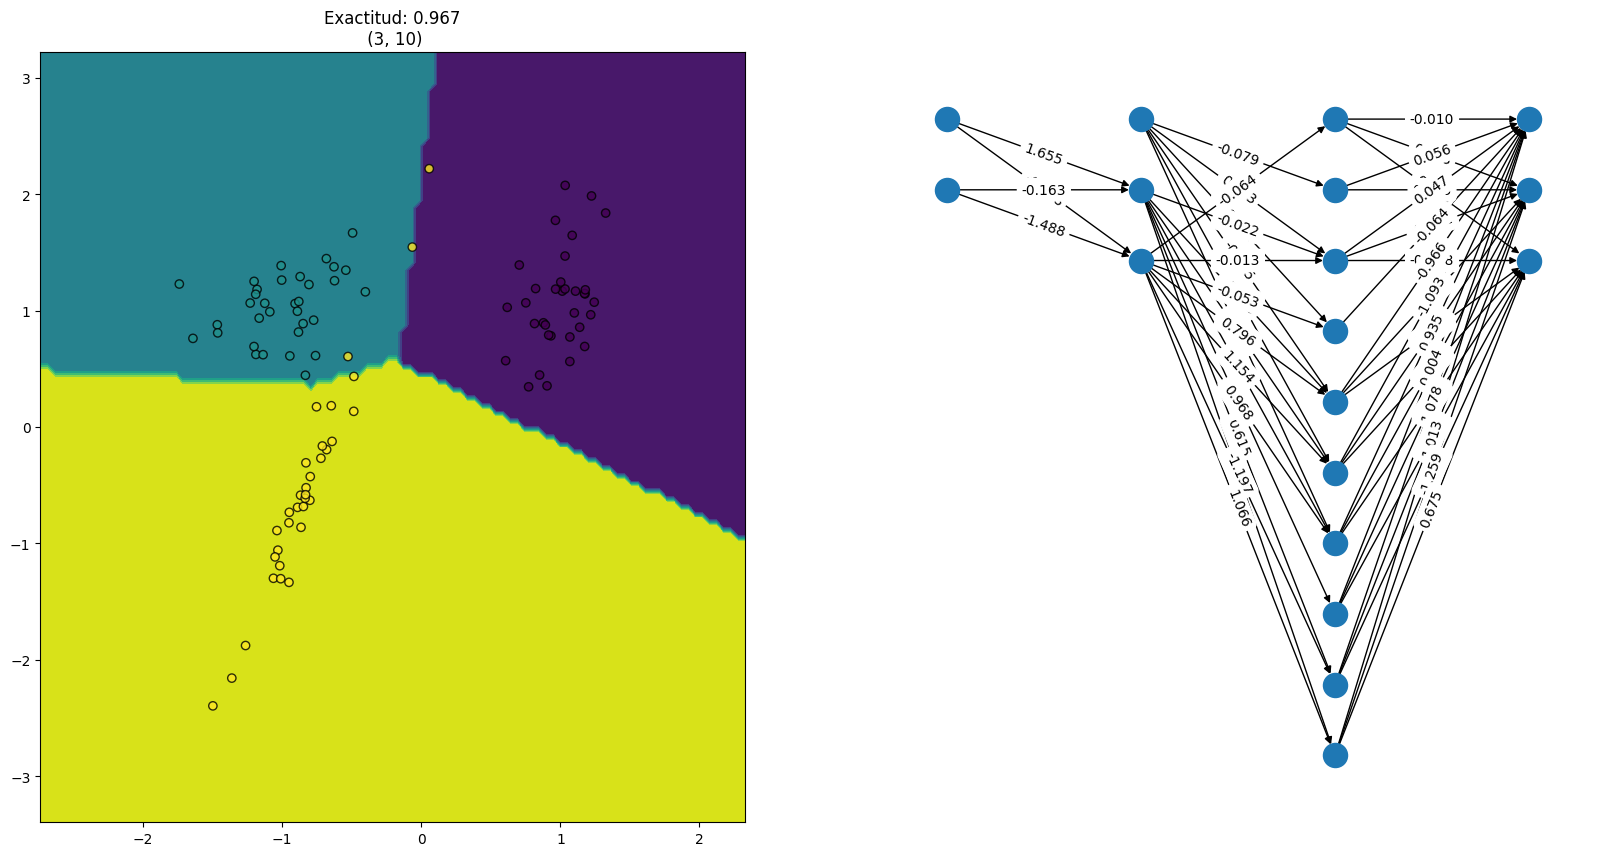

In [ ]:
MultiLayer(X, y, net1)

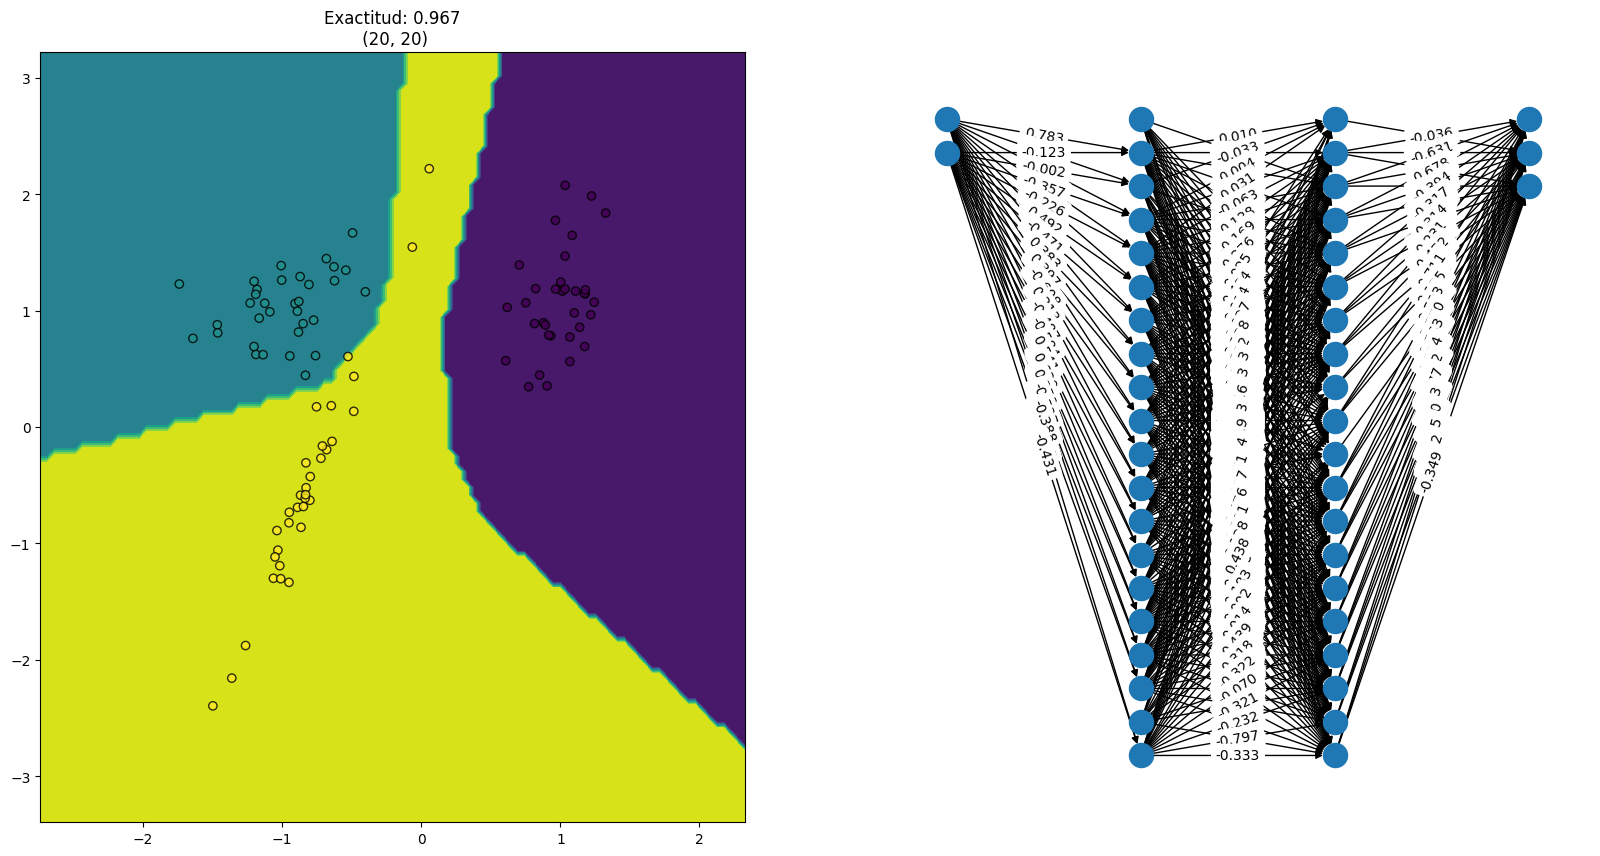

In [ ]:
MultiLayer(X, y, net2)

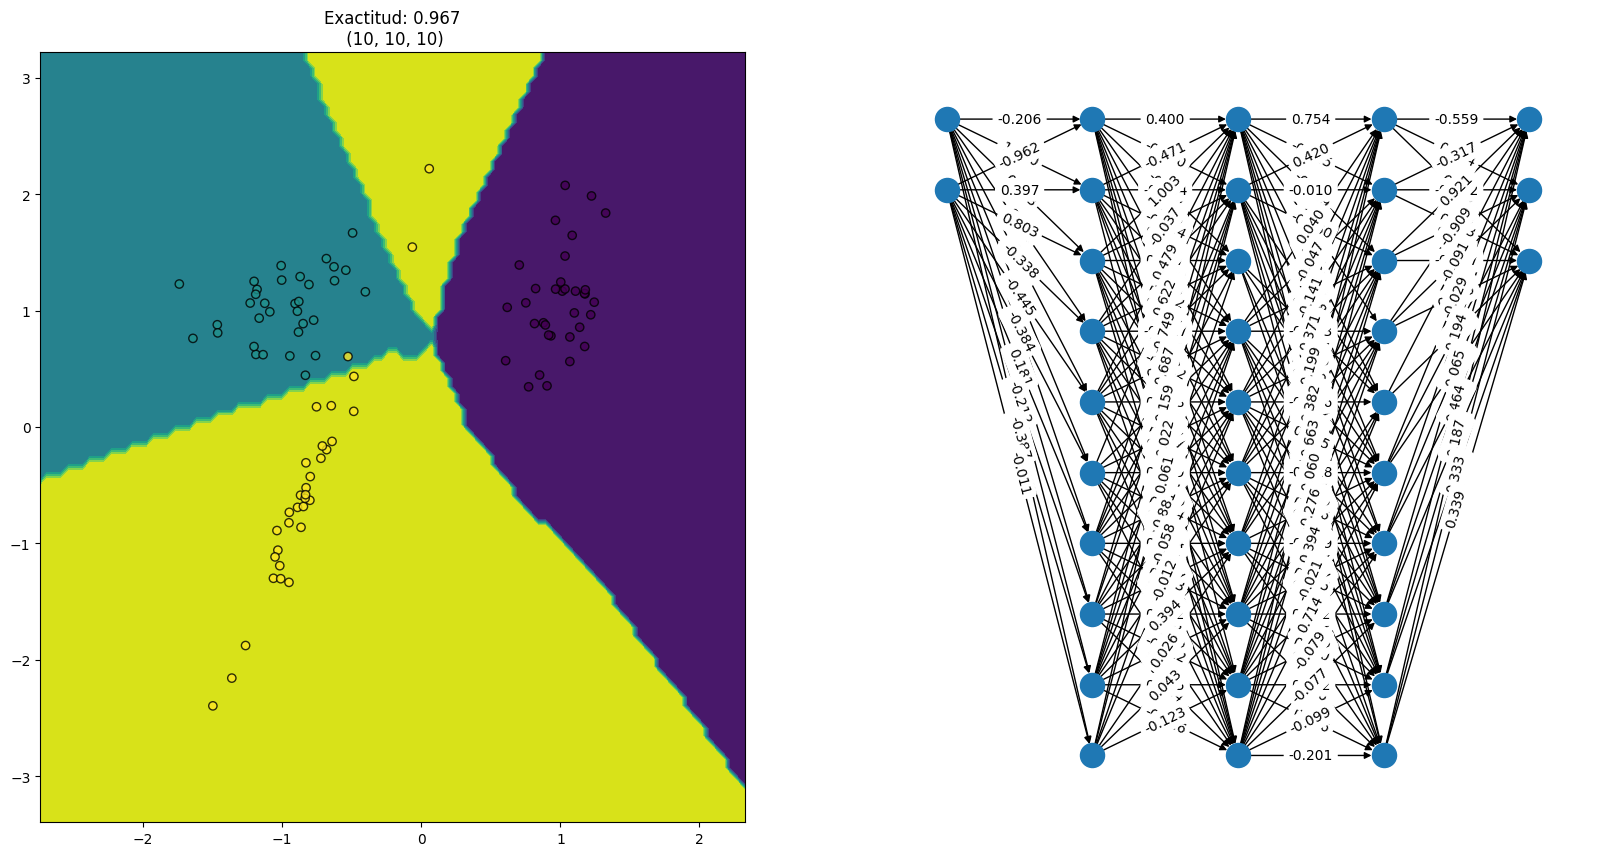

In [ ]:
MultiLayer(X, y, net3)